# Statistical analysis

Created by Roman Sivolobtsev

### Preparation

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv', encoding='utf-8', lineterminator='\n')

In [3]:
train[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S\r
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C\r
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S\r
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S\r
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S\r
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q\r
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S\r
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S\r
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S\r
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C\r


### Number of Survivors
1) Определить число выживших (Survived: 1) и погибших (Survived: 0) пассажиров в абсолютных и относительных величинах.

In [4]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
people_count = len(train)
[dead_count, survived_count] = train['Survived'].value_counts()

In [6]:
dead_absolute = dead_count # Количество умерших человек. абсолютная величина
dead_relative = 100*(dead_count/people_count) # Процент умерших людей. относительная величина 
survived_absolute = survived_count # Количество умерших человек. абсолютная величина
survived_relative = 100*(survived_count/people_count) # Процент выживших людей. относительная величина 

In [7]:
print("Относительная величина (количество человек): " + str(dead_absolute) + " человека умерло, " + str(survived_absolute) + " человека выжило.")
print("Аюсолютная величина (процент): " + str(round(dead_relative,1)) + "% умерло, " + str(round(survived_relative,1)) + "% выжило.")

Относительная величина (количество человек): 549 человека умерло, 342 человека выжило.
Аюсолютная величина (процент): 61.6% умерло, 38.4% выжило.


### MinMax Age
2) Найти минимальный и максимальный возраст (Age) пассажиров.

In [8]:
age_min = train['Age'].min()
age_max = train['Age'].max()

In [9]:
"Минимальный возраст пассажира - {0}; Максимальный возраст пассажира - {1}".format(age_min, age_max)

'Минимальный возраст пассажира - 0.42; Максимальный возраст пассажира - 80.0'

По цифрам похоже что возраст измеряется в годах. Хотя мне не особо нравится дробное представление, уж лучше делали бы в днях.

### PClass with the highest survival rate
3) Пассажиры какого класса (PClass) имели самую большую долю выживших

In [10]:
Pclass = train['Pclass'].unique()
Pclass_proc = {}

for ticket_class in Pclass:
    people = train[train['Pclass'] == ticket_class]['Survived']
    Pclass_proc[ticket_class] = 100*(people.sum()/len(people.index))
    
Pclass_proc

{1: 62.96296296296296, 2: 47.28260869565217, 3: 24.236252545824847}

Пассажиры PClass=1 имеют самый большой процент выживших среди всех пассажиров своего же класса. 

В первом номере получилось, что только 38,4% от общего количества людей выжило. Тут явно видно что в первом классе было выгодней находится.

In [11]:
(ticket_class, proc) = max(Pclass_proc.items(), key=lambda x: x[1])

print('Pclass = {0} имеет самую высокую долю выживших пассажиров({1}%)'.format(ticket_class, round(proc,2)))

Pclass = 1 имеет самую высокую долю выживших пассажиров(62.96%)


### Embarked with the lowest survival rate
4)	Пассажиры, севшие в каком порту (Embarked) имели самую низкую долю вышивших.

Немножко подкорректирую заголовки

In [12]:
train.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked\r'],
      dtype='object')

In [13]:
train.columns =[x.rstrip('\r') for x in train.columns] 

In [14]:
Embarked = train['Embarked'].unique()
Embarked_proc = {}

for port in Embarked:
    people = train[train['Embarked'] == port]['Survived']
    Embarked_proc[port] = 100*(people.sum()/len(people.index))
    
Embarked_proc

{'\r': 100.0,
 'C\r': 55.35714285714286,
 'Q\r': 38.961038961038966,
 'S\r': 33.69565217391305}

In [15]:
(port, proc) = min(Embarked_proc.items(), key=lambda x: x[1])

'Embarked = {0} имеет самую низкую долю выживших пассажиров({1}%)'.format(port, round(proc,2))

'Embarked = S\r имеет самую низкую долю выживших пассажиров(33.7%)'

In [16]:
train[train['Embarked'] == '\r']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,\r
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,\r


Предпологаю что тут "\r" так же новая строка которая попала в данные, а порта на корабле 3 - C, Q, S. И тогда пустая строка(таких только 2 человека в выборке) означает что человек не садился на титаник.

### Correlation between Age & Survived.
5)	Найти корреляцию между полями Age и Survived

In [17]:
agesurvived_coef = train[["Age", "Survived"]].corr()['Survived']['Age']
"Коэффициент корреляции между возрастом пассажиров и их выживаемостью: " + str(agesurvived_coef)

'Коэффициент корреляции между возрастом пассажиров и их выживаемостью: -0.0772210945722'

Достаточно маленькое значение. На мой взгляд это обусловленно тем, что спасали стариков и молодых, тем самым нету корреляции между возрастом и выживаемостью. Если бы пришлось строить модель, то в какой-нибудь регресии этот признак в явном виде был бы не информативным, зато крайне информативным в деревьях принятия решений. Посмотрим зависимость выживаемости от других факторов.

In [18]:
# Хочется посмотреть на корреляция с полом, для этого нужно сделать признак категориальным.

temp = train
temp['Sex'] = [1 if x=="male" else 0 for x in train['Sex']] # Делаем признак категориальным 
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

Sex ожидаемо имеет самую высокую корреляцию. Значение отрицательное, значит женщины имеют больший процент выживаемости, нежели мужчины.

Pclass имеет неплохую корреляцию. Причём как было показано в прошлом номере чем лучше класс(меньше, например 1 класс), тем больше шансов было выжить.

Fare имеет тоже достаточно высокую корреляцию с выживаемостью. Мне кажется это связано с тем, что чем выше был класс, тем больше его Fare.

In [19]:
train[["Fare", "Pclass"]].corr()['Pclass']['Fare']

-0.54949961994390606

Как и ожидалось

### Empirical function and histogramm
6)	Построить эмпирическую функцию распределения и гистограмму распределения возраста (Age)

In [20]:
ages = np.array(train['Age'])
ages = np.sort(ages[~np.isnan(ages)])
ages_count = ages.size

Насчёт удаления пустого возраста я не уверен, но не придумал ничего другого. Заменять средним будет точно не правильным.

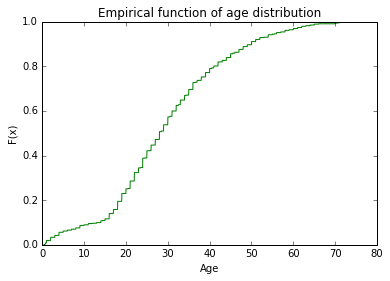

In [27]:
def F(x):
    return ages[ages<=x].size/ages_count

x = np.arange(age_min-0.001, age_max+0.001, age_max/(10*ages_count))
y = list(map(F, x))
plt.plot(x, y, "g")   
plt.ylim(0, 1)
plt.xlabel("Age")
plt.ylabel("F(x)")
plt.title("Empirical function of age distribution")
plt.show()

Для гистограммы возьмём 40 столбцов.

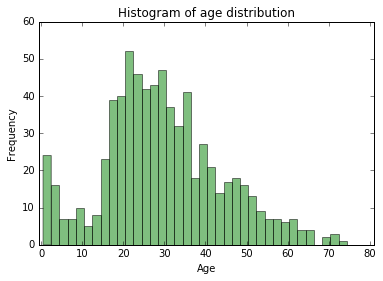

In [26]:
column = 40

bins =np.arange(age_min, age_max, age_max/column)    
plt.hist(ages, bins=bins, alpha=0.5, color="g")
plt.title("Histogram of age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(age_min-1, age_max+1)
plt.show()